<a href="https://colab.research.google.com/github/PunnitaThongbor/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**นางสาวพัณณิตา ทองบ่อ 643020508-2 เลขที่ 10 (สอบ Midterm)**

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

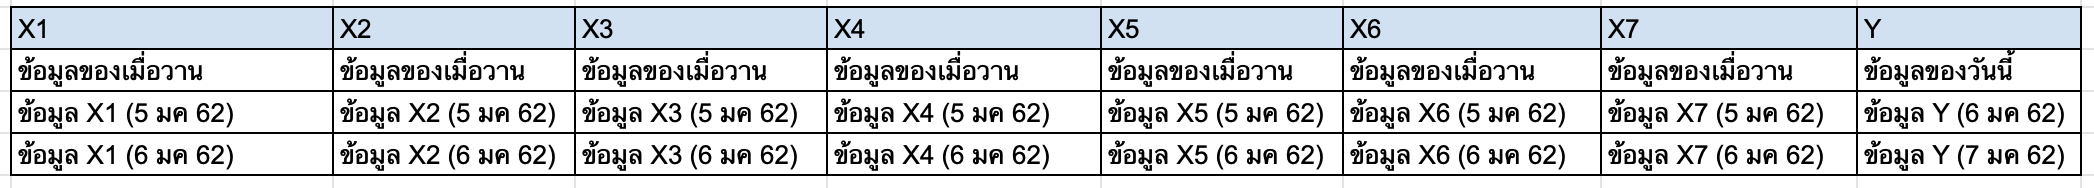

#Import Data

In [1611]:
import pandas as pd
import numpy as np
import os

In [1612]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.ความกด

In [1613]:
#ความกดอากาศของทั้ง 5 จังหวัด
Pressure_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความกดอากาศ/จ.ขอนแก่น.xlsx',header=4)
Pressure_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความกดอากาศ/จ.นครพนม.xlsx',header=4)
Pressure_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความกดอากาศ/จ.สกลนคร.xlsx',header=4)
Pressure_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความกดอากาศ/จ.หนองคาย.xlsx',header=4)
Pressure_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความกดอากาศ/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1614]:
Pressure_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [1615]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1616]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
Pressure_KK = Pressure_KK.rename(columns=b)
Pressure_NPN = Pressure_NPN.rename(columns=b)
Pressure_SKN = Pressure_SKN.rename(columns=b)
Pressure_NK = Pressure_NK.rename(columns=b)
Pressure_L = Pressure_L.rename(columns=b)

In [1617]:
Pressure_KK['year'] = Pressure_KK['เดือน/ปี'].dt.year
Pressure_KK['month'] = Pressure_KK['เดือน/ปี'].dt.month
Pressure_KK = Pressure_KK.drop(['เดือน/ปี'], axis =1)

In [1618]:
Pressure_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1619]:
Pressure_KK=Pressure_KK.replace('-',np.NaN)
Pressure_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1620]:
#มีค่าผิดปกติ 3 ค่า ในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Pressure_KK['ที่'])):Pressure_KK.iloc[i,:]=Pressure_KK.iloc[i,:].fillna(Pressure_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
Pressure_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1621]:
Pressure_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667,2012,2


##นครพนม

In [1622]:
Pressure_NPN['year'] = Pressure_NPN['เดือน/ปี'].dt.year
Pressure_NPN['month'] = Pressure_NPN['เดือน/ปี'].dt.month
Pressure_NPN = Pressure_NPN.drop(['เดือน/ปี'], axis =1)

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1623]:
Pressure_NPN=Pressure_NPN.replace('-',np.NaN)
Pressure_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1624]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Pressure_NPN['ที่'])):Pressure_NPN.iloc[i,:]=Pressure_NPN.iloc[i,:].fillna(Pressure_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
Pressure_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1625]:
Pressure_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1012.184667,1012.184667,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1010.608000,1010.608000,2012,2


##สกลนคร

In [1626]:
Pressure_SKN['year'] = Pressure_SKN['เดือน/ปี'].dt.year
Pressure_SKN['month'] = Pressure_SKN['เดือน/ปี'].dt.month
Pressure_SKN = Pressure_SKN.drop(['เดือน/ปี'], axis =1)

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1627]:
Pressure_SKN=Pressure_SKN.replace('-',np.NaN)
Pressure_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1628]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Pressure_SKN['ที่'])):Pressure_SKN.iloc[i,:]=Pressure_SKN.iloc[i,:].fillna(Pressure_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
Pressure_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1629]:
Pressure_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000,2012,2


##หนองคาย

In [1630]:
Pressure_NK['year'] = Pressure_NK['เดือน/ปี'].dt.year
Pressure_NK['month'] = Pressure_NK['เดือน/ปี'].dt.month
Pressure_NK = Pressure_NK.drop(['เดือน/ปี'], axis =1)

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1631]:
Pressure_NK=Pressure_NK.replace('-',np.NaN)
Pressure_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1632]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Pressure_NK['ที่'])):Pressure_NK.iloc[i,:]=Pressure_NK.iloc[i,:].fillna(Pressure_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
Pressure_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1633]:
Pressure_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667,2012,2


##เลย

In [1634]:
Pressure_L['year'] = Pressure_L['เดือน/ปี'].dt.year
Pressure_L['month'] = Pressure_L['เดือน/ปี'].dt.month
Pressure_L = Pressure_L.drop(['เดือน/ปี'], axis =1)

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1635]:
Pressure_L=Pressure_L.replace('-',np.NaN)
Pressure_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1636]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Pressure_L['ที่'])):Pressure_L.iloc[i,:]=Pressure_L.iloc[i,:].fillna(Pressure_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
Pressure_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1637]:
Pressure_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667,2012,2


##2.ความชื้นสัมพัทธ์

In [1638]:
#ข้อมูลความชื้นสัมพัทธ์ของทั้ง 5 จังหวัด
relative_humidity_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
relative_humidity_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
relative_humidity_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
relative_humidity_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
relative_humidity_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1639]:
relative_humidity_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [1640]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1641]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
relative_humidity_KK = relative_humidity_KK.rename(columns=b)
relative_humidity_NPN = relative_humidity_KK.rename(columns=b)
relative_humidity_SKN = relative_humidity_KK.rename(columns=b)
relative_humidity_NK = relative_humidity_KK.rename(columns=b)
relative_humidity_L = relative_humidity_KK.rename(columns=b)

In [1642]:
relative_humidity_KK['year'] = relative_humidity_KK['เดือน/ปี'].dt.year
relative_humidity_KK['month'] = relative_humidity_KK['เดือน/ปี'].dt.month
relative_humidity_KK = relative_humidity_KK.drop(['เดือน/ปี'], axis =1)

relative_humidity_NPN['year'] = relative_humidity_NPN['เดือน/ปี'].dt.year
relative_humidity_NPN['month'] = relative_humidity_NPN['เดือน/ปี'].dt.month
relative_humidity_NPN = relative_humidity_NPN.drop(['เดือน/ปี'], axis =1)

relative_humidity_SKN['year'] = relative_humidity_SKN['เดือน/ปี'].dt.year
relative_humidity_SKN['month'] = relative_humidity_SKN['เดือน/ปี'].dt.month
relative_humidity_SKN = relative_humidity_SKN.drop(['เดือน/ปี'], axis =1)

relative_humidity_NK['year'] = relative_humidity_NK['เดือน/ปี'].dt.year
relative_humidity_NK['month'] = relative_humidity_NK['เดือน/ปี'].dt.month
relative_humidity_NK = relative_humidity_NK.drop(['เดือน/ปี'], axis =1)

relative_humidity_L['year'] = relative_humidity_L['เดือน/ปี'].dt.year
relative_humidity_L['month'] = relative_humidity_L['เดือน/ปี'].dt.month
relative_humidity_L = relative_humidity_L.drop(['เดือน/ปี'], axis =1)


In [1643]:
relative_humidity_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71,71,68,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67,65,-,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66,63,64,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70,67,68,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68,-,-,65,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1644]:
relative_humidity_KK=relative_humidity_KK.replace('-',np.NaN)
relative_humidity_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1645]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(relative_humidity_KK['ที่'])):relative_humidity_KK.iloc[i,:]=relative_humidity_KK.iloc[i,:].fillna(relative_humidity_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
relative_humidity_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1646]:
relative_humidity_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71.0,71.0,68.0,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67.0,65.0,68.0,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66.0,63.0,64.0,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70.0,67.0,68.0,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68.0,65.0,65.0,65,2012,2


##นครพนม


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1647]:
relative_humidity_NPN=relative_humidity_NPN.replace('-',np.NaN)
relative_humidity_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1648]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(relative_humidity_NPN['ที่'])):relative_humidity_NPN.iloc[i,:]=relative_humidity_NPN.iloc[i,:].fillna(relative_humidity_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
relative_humidity_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1649]:
relative_humidity_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71.0,71.0,68.0,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67.0,65.0,68.0,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66.0,63.0,64.0,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70.0,67.0,68.0,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68.0,65.0,65.0,65,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1650]:
relative_humidity_SKN=relative_humidity_SKN.replace('-',np.NaN)
relative_humidity_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1651]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(relative_humidity_SKN['ที่'])):relative_humidity_SKN.iloc[i,:]=relative_humidity_SKN.iloc[i,:].fillna(relative_humidity_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
relative_humidity_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1652]:
relative_humidity_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71.0,71.0,68.0,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67.0,65.0,68.0,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66.0,63.0,64.0,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70.0,67.0,68.0,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68.0,65.0,65.0,65,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1653]:
relative_humidity_NK=relative_humidity_NK.replace('-',np.NaN)
relative_humidity_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1654]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(relative_humidity_NK['ที่'])):relative_humidity_NK.iloc[i,:]=relative_humidity_NK.iloc[i,:].fillna(relative_humidity_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
relative_humidity_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1655]:
relative_humidity_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71.0,71.0,68.0,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67.0,65.0,68.0,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66.0,63.0,64.0,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70.0,67.0,68.0,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68.0,65.0,65.0,65,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1656]:
relative_humidity_L=relative_humidity_L.replace('-',np.NaN)
relative_humidity_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1657]:
#มีค่าผิดปกติในแถวที่ 29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(relative_humidity_L['ที่'])):relative_humidity_L.iloc[i,:]=relative_humidity_L.iloc[i,:].fillna(relative_humidity_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
relative_humidity_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

#3.ความเร็วลม

In [1658]:
#ข้อมูลความเร็วลมของทั้ง 5 จังหวัด
wind_speed_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความเร็วลม/จ.ขอนแก่น.xlsx',header=4)
wind_speed_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความเร็วลม/จ.นครพนม.xlsx',header=4)
wind_speed_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความเร็วลม/จ.สกลนคร.xlsx',header=4)
wind_speed_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความเร็วลม/จ.หนองคาย.xlsx',header=4)
wind_speed_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ความเร็วลม/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1659]:
wind_speed_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [1660]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1661]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
wind_speed_KK = wind_speed_KK.rename(columns=b)
wind_speed_NPN = wind_speed_NPN.rename(columns=b)
wind_speed_SKN = wind_speed_SKN.rename(columns=b)
wind_speed_NK = wind_speed_NK.rename(columns=b)
wind_speed_L = wind_speed_L.rename(columns=b)

In [1662]:
wind_speed_KK['year'] = wind_speed_KK['เดือน/ปี'].dt.year
wind_speed_KK['month'] = wind_speed_KK['เดือน/ปี'].dt.month
wind_speed_KK = wind_speed_KK.drop(['เดือน/ปี'], axis =1)

wind_speed_NPN['year'] = wind_speed_NPN['เดือน/ปี'].dt.year
wind_speed_NPN['month'] = wind_speed_NPN['เดือน/ปี'].dt.month
wind_speed_NPN = wind_speed_NPN.drop(['เดือน/ปี'], axis =1)

wind_speed_SKN['year'] = wind_speed_SKN['เดือน/ปี'].dt.year
wind_speed_SKN['month'] = wind_speed_SKN['เดือน/ปี'].dt.month
wind_speed_SKN = wind_speed_SKN.drop(['เดือน/ปี'], axis =1)

wind_speed_NK['year'] = wind_speed_NK['เดือน/ปี'].dt.year
wind_speed_NK['month'] = wind_speed_NK['เดือน/ปี'].dt.month
wind_speed_NK = wind_speed_NK.drop(['เดือน/ปี'], axis =1)

wind_speed_L['year'] = wind_speed_L['เดือน/ปี'].dt.year
wind_speed_L['month'] = wind_speed_L['เดือน/ปี'].dt.month
wind_speed_L = wind_speed_L.drop(['เดือน/ปี'], axis =1)

In [1663]:
wind_speed_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,5,5,5,4,6,4,5,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,5,5,3,1,3,3,-,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,7,6,5,4,4,6,5,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,4,2,2,1,3,4,4,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,3,2,4,3,3,3,-,2.566667,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1664]:
wind_speed_KK=wind_speed_KK.replace('-',np.NaN)
wind_speed_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1665]:
#มีค่าผิดปกติในแถวที่ 3,21,29,30,31 แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(wind_speed_KK['ที่'])):wind_speed_KK.iloc[i,:]=wind_speed_KK.iloc[i,:].fillna(wind_speed_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
wind_speed_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1666]:
wind_speed_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3.0,2,2,3,4,3,...,5,5,5,4,6.0,4.0,5.000000,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3.0,3,5,2,3,3,...,5,5,3,1,3.0,3.0,3.466667,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4.0,4,4,4,4,4,...,7,6,5,4,4.0,6.0,5.000000,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1.0,4,4,2,4,6,...,4,2,2,1,3.0,4.0,4.000000,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3.0,2,3,1,2,3,...,3,2,4,3,3.0,3.0,2.566667,2.566667,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1667]:
wind_speed_NPN=wind_speed_NPN.replace('-',np.NaN)
wind_speed_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4             True
5             True
6            False
7             True
8             True
9            False
10            True
11            True
12            True
13           False
14           False
15            True
16            True
17           False
18            True
19           False
20            True
21            True
22            True
23           False
24            True
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1668]:
#มีค่าผิดปกติ แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(wind_speed_NPN['ที่'])):wind_speed_NPN.iloc[i,:]=wind_speed_NPN.iloc[i,:].fillna(wind_speed_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
wind_speed_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1669]:
wind_speed_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1.0,0,2.0,1.0,...,2.0,1,2,2.0,1.0,1.0,1.0,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1.0,1,1.0,1.0,...,2.0,2,1,1.0,1.0,1.0,1.2,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1.0,1,1.0,2.0,...,3.0,1,2,1.0,1.0,2.0,2.0,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,2.0,3,3.0,4.0,...,5.0,1,1,1.0,4.0,5.0,4.0,2.448276,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0.0,0.0,1,1.0,4.0,...,2.0,3,3,3.0,1.0,2.0,2.2,2.200000,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1670]:
wind_speed_SKN=wind_speed_SKN.replace('-',np.NaN)
wind_speed_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20            True
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1671]:
#มีค่าผิดปกติ แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(wind_speed_SKN['ที่'])):wind_speed_SKN.iloc[i,:]=wind_speed_SKN.iloc[i,:].fillna(wind_speed_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
wind_speed_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1672]:
wind_speed_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1,0,2,1,...,2,1,2,2,1.0,1.0,1.000000,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1,1,1,1,...,2,2,1,1,1.0,1.0,1.200000,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1,1,1,2,...,3,1,2,1,1.0,2.0,2.000000,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,5,3,2,3,3.0,3.0,4.000000,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,1,3,7,5,3.0,2.0,2.733333,2.733333,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1673]:
wind_speed_NK=wind_speed_NK.replace('-',np.NaN)
wind_speed_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1674]:
#มีค่าผิดปกติ แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(wind_speed_NK['ที่'])):wind_speed_NK.iloc[i,:]=wind_speed_NK.iloc[i,:].fillna(wind_speed_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
wind_speed_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1675]:
wind_speed_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2.0,1,3,1,2,...,3,3,3,3,3.0,3.0,4.000000,2.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2.0,2,1,2,3,...,2,3,2,2,2.0,2.0,2.433333,2.433333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2.0,2,2,2,4,...,5,4,2,2,2.0,3.0,2.000000,3.161290,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,5,3,2,3,3.0,3.0,4.000000,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,1,3,7,5,3.0,2.0,2.733333,2.733333,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1676]:
wind_speed_L=wind_speed_L.replace('-',np.NaN)
wind_speed_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16            True
17           False
18           False
19            True
20           False
21           False
22           False
23           False
24            True
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1677]:
#มีค่าผิดปกติ แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(wind_speed_L['ที่'])):wind_speed_L.iloc[i,:]=wind_speed_L.iloc[i,:].fillna(wind_speed_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
wind_speed_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1678]:
wind_speed_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3.0,2,1,1,...,2,2,1,2,2.0,2.0,1.0,1.612903,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2.0,2,2,2,...,1,1,2,1,2.0,1.0,1.7,1.700000,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1.0,2,1,1,...,3,2,1,2,1.0,2.0,2.0,1.870968,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2.0,2,2,2,...,3,2,2,2,2.0,1.0,1.0,1.838710,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1.0,2,1,2,...,1,1,3,4,2.0,1.0,1.7,1.700000,2012,2


#4.จำนวนเมฆ

In [1679]:
#ข้อมูลจำนวนเมฆของทั้ง 5 จังหวัด
cloud_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/จำนวนเมฆ/จ.ขอนแก่น.xlsx',header=4)
cloud_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/จำนวนเมฆ/จ.นครพนม.xlsx',header=4)
cloud_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/จำนวนเมฆ/จ.สกลนคร.xlsx',header=4)
cloud_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/จำนวนเมฆ/จ.หนองคาย.xlsx',header=4)
cloud_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/จำนวนเมฆ/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1680]:
cloud_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [1681]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1682]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
cloud_KK = cloud_KK.rename(columns=b)
cloud_NPN = cloud_NPN.rename(columns=b)
cloud_SKN = cloud_SKN.rename(columns=b)
cloud_NK = cloud_NK.rename(columns=b)
cloud_L = cloud_L.rename(columns=b)

In [1683]:
cloud_KK['year'] = cloud_KK['เดือน/ปี'].dt.year
cloud_KK['month'] = cloud_KK['เดือน/ปี'].dt.month
cloud_KK = cloud_KK.drop(['เดือน/ปี'], axis =1)

cloud_NPN['year'] = cloud_NPN['เดือน/ปี'].dt.year
cloud_NPN['month'] = cloud_NPN['เดือน/ปี'].dt.month
cloud_NPN = cloud_NPN.drop(['เดือน/ปี'], axis =1)

cloud_SKN['year'] = cloud_SKN['เดือน/ปี'].dt.year
cloud_SKN['month'] = cloud_SKN['เดือน/ปี'].dt.month
cloud_SKN = cloud_SKN.drop(['เดือน/ปี'], axis =1)

cloud_NK['year'] = cloud_NK['เดือน/ปี'].dt.year
cloud_NK['month'] = cloud_NK['เดือน/ปี'].dt.month
cloud_NK = cloud_NK.drop(['เดือน/ปี'], axis =1)

cloud_L['year'] = cloud_L['เดือน/ปี'].dt.year
cloud_L['month'] = cloud_L['เดือน/ปี'].dt.month
cloud_L = cloud_L.drop(['เดือน/ปี'], axis =1)

In [1684]:
cloud_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,10,10,8,10,10,10,7,...,5,3,3,5,4,2,2,6.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2,2,3,6,9,6,...,3,2,2,1,3,2,-,3.533333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,3,4,4,5,8,7,6,...,3,3,1,2,1,1,1,3.516129,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,4,7,6,3,1,3,3,...,4,3,2,5,6,10,10,5.354839,2012,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8,8,3,3,1,2,...,0,1,4,5,1,2,-,2.533333,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1685]:
cloud_KK=cloud_KK.replace('-',np.NaN)
cloud_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1686]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(cloud_KK['ที่'])):cloud_KK.iloc[i,:]=cloud_KK.iloc[i,:].fillna(cloud_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
cloud_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1687]:
cloud_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,10,10.0,8,10,10,10,7,...,5,3,3,5,4.0,2.0,2.000000,6.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2.0,2,3,6,9,6,...,3,2,2,1,3.0,2.0,3.533333,3.533333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,3,4.0,4,5,8,7,6,...,3,3,1,2,1.0,1.0,1.000000,3.516129,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,4,7.0,6,3,1,3,3,...,4,3,2,5,6.0,10.0,10.000000,5.354839,2012,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8.0,8,3,3,1,2,...,0,1,4,5,1.0,2.0,2.533333,2.533333,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1688]:
cloud_NPN=cloud_NPN.replace('-',np.NaN)
cloud_NPN.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11           False
12           False
13            True
14            True
15            True
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26           False
27            True
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1689]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(cloud_NPN['ที่'])):cloud_NPN.iloc[i,:]=cloud_NPN.iloc[i,:].fillna(cloud_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
cloud_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1690]:
cloud_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10.0,7.0,8.0,8.0,10.0,10.0,9.0,4.0,...,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,3.0,5.0,7.0,9.0,6.0,...,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667,2011,11
2,3,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,4.0,4.0,7.0,8.0,3.0,...,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,4.0,6.0,4.0,2.0,5.0,6.0,...,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935,2012,1
4,2,353301-เลย สกษ. จ.เลย,5.0,5.0,8.0,7.0,3.0,3.0,2.0,1.0,...,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1691]:
cloud_SKN=cloud_SKN.replace('-',np.NaN)
cloud_SKN.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1692]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(cloud_SKN['ที่'])):cloud_SKN.iloc[i,:]=cloud_SKN.iloc[i,:].fillna(cloud_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
cloud_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1693]:
cloud_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9.0,9.0,7.0,7.0,9.0,10.0,8.0,6.0,...,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,0.0,0.0,1.0,3.0,7.0,8.0,5.0,...,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,1.0,2.0,2.0,2.0,6.0,6.0,4.0,...,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704,2011,12
3,1,353301-เลย สกษ. จ.เลย,0.0,0.0,4.0,3.0,2.0,0.0,1.0,2.0,...,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387,2012,1
4,2,353301-เลย สกษ. จ.เลย,4.0,4.0,8.0,5.0,1.0,0.0,0.0,0.0,...,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1694]:
cloud_NK=cloud_NK.replace('-',np.NaN)
cloud_NK.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1695]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(cloud_NK['ที่'])):cloud_NK.iloc[i,:]=cloud_NK.iloc[i,:].fillna(cloud_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
cloud_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1696]:
cloud_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,6.000000,...,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,4.000000,...,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429,2011,11
2,3,353301-เลย สกษ. จ.เลย,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,5.000000,...,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,4.000000,...,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194,2012,1
4,2,353301-เลย สกษ. จ.เลย,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,4.928571,...,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1697]:
cloud_L=cloud_L.replace('-',np.NaN)
cloud_L.isnull().any()

ที่            False
สถานี          False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
ค่าเฉลี่ย      False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
year           False
month          False
dtype: bool

In [1698]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(cloud_L['ที่'])):cloud_L.iloc[i,:]=cloud_L.iloc[i,:].fillna(cloud_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
cloud_L.isnull().any()

ที่            False
สถานี          False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29             False
30             False
31             False
ค่าเฉลี่ย      False
Unnamed: 35    False
Unnamed: 36    False
Unnamed: 37    False
Unnamed: 38    False
Unnamed: 39    False
Unnamed: 40    False
Unnamed: 41    False
Unnamed: 42    False
Unnamed: 43    False
Unnamed: 44    False
year           False
month          False
dtype: bool

In [1699]:
cloud_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,7.000000,...,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,2.000000,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,5.000000,...,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,1.000000,...,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,2.809524,...,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2012,2


#5.ปริมาณน้ำฝน

In [1700]:
#ข้อมูลจำนวนเมฆของทั้ง 5 จังหวัด
rainfall_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ปริมาณฝน/จ.ขอนแก่น.xlsx',header=4)
rainfall_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ปริมาณฝน/จ.นครพนม.xlsx',header=4)
rainfall_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ปริมาณฝน/จ.สกล.xlsx',header=4)
rainfall_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ปริมาณฝน/จ.หนองคาย.xlsx',header=4)
rainfall_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/ปริมาณฝน/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1701]:
rainfall_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [1702]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1703]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
rainfall_KK = rainfall_KK.rename(columns=b)
rainfall_NPN = rainfall_NPN.rename(columns=b)
rainfall_SKN = rainfall_SKN.rename(columns=b)
rainfall_NK = rainfall_NK.rename(columns=b)
rainfall_L = rainfall_L.rename(columns=b)

In [1704]:
rainfall_KK['year'] = rainfall_KK['เดือน/ปี'].dt.year
rainfall_KK['month'] = rainfall_KK['เดือน/ปี'].dt.month
rainfall_KK = rainfall_KK.drop(['เดือน/ปี'], axis =1)

rainfall_NPN['year'] = rainfall_NPN['เดือน/ปี'].dt.year
rainfall_NPN['month'] = rainfall_NPN['เดือน/ปี'].dt.month
rainfall_NPN = rainfall_NPN.drop(['เดือน/ปี'], axis =1)

rainfall_SKN['year'] = rainfall_SKN['เดือน/ปี'].dt.year
rainfall_SKN['month'] = rainfall_SKN['เดือน/ปี'].dt.month
rainfall_SKN = rainfall_SKN.drop(['เดือน/ปี'], axis =1)

rainfall_NK['year'] = rainfall_NK['เดือน/ปี'].dt.year
rainfall_NK['month'] = rainfall_NK['เดือน/ปี'].dt.month
rainfall_NK = rainfall_NK.drop(['เดือน/ปี'], axis =1)

rainfall_L['year'] = rainfall_L['เดือน/ปี'].dt.year
rainfall_L['month'] = rainfall_L['เดือน/ปี'].dt.month
rainfall_L = rainfall_L.drop(['เดือน/ปี'], axis =1)

In [1705]:
rainfall_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3,0,2.2,0.5,1.3,0.2,...,T,0,0.5,1.1,0,0,0,176.8,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,3.2,...,0,0,0,0,0,0,-,11.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,T,0,38.7,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,T,0,0,0,0,0,...,0,0,0,0,0,-,-,T,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1706]:
rainfall_KK=rainfall_KK.replace('-',np.NaN)
rainfall_KK=rainfall_KK.replace('T',0.1)
rainfall_KK.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
year         False
month        False
dtype: bool

In [1707]:
rainfall_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3.0,0.0,2.2,0.5,1.3,0.2,...,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.1,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1708]:
rainfall_NPN=rainfall_NPN.replace('-',np.NaN)
rainfall_NPN=rainfall_NPN.replace('T',0.1)
rainfall_NPN.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
year         False
month        False
dtype: bool

In [1709]:
rainfall_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,17.0,0.3,0.0,0.3,1.9,0.1,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4,2011,10
1,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,NaN,0.5,2011,11
2,3,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9,2012,1
4,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.2,0.0,0.0,NaN,NaN,1.2,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1710]:
rainfall_SKN=rainfall_SKN.replace('-',np.NaN)
rainfall_SKN=rainfall_SKN.replace('T',0.1)
rainfall_SKN.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
year         False
month        False
dtype: bool

In [1711]:
rainfall_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0.0,0.1,5.5,0.3,0.0,0.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8,2011,10
1,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.1,0.1,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.8,2011,11
2,3,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4,2012,1
4,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,5.6,0.0,0.0,NaN,NaN,6.0,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1712]:
rainfall_NK=rainfall_NK.replace('-',np.NaN)
rainfall_NK=rainfall_NK.replace('T',0.1)
rainfall_NK.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
year         False
month        False
dtype: bool

In [1713]:
rainfall_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,48.6,59.0,0.0,1.0,19.1,6.2,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3,2011,10
1,2,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.1,2011,11
2,3,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4,2012,1
4,2,352201-หนองคาย จ.หนองคาย,0.0,28.7,9.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.1,0.0,0.0,NaN,NaN,43.9,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1714]:
rainfall_L=rainfall_L.replace('-',np.NaN)
rainfall_L=rainfall_L.replace('T',0.1)
rainfall_L.isnull().any()

ที่          False
สถานี        False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
year         False
month        False
dtype: bool

In [1715]:
rainfall_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0.0,0.0,3.4,1.8,0.6,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0,2011,10
1,2,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,NaN,7.4,2011,11
2,3,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,2011,12
3,1,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2,2012,1
4,2,353201-เลย จ.เลย,0.0,0.2,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.4,2012,2


 แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [1716]:
for i in range(len(rainfall_KK['ที่'])):rainfall_KK.iloc[i,:]=rainfall_KK.iloc[i,:].fillna(rainfall_KK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_NPN['ที่'])):rainfall_NPN.iloc[i,:]=rainfall_NPN.iloc[i,:].fillna(rainfall_NPN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_SKN['ที่'])):rainfall_SKN.iloc[i,:]=rainfall_SKN.iloc[i,:].fillna(rainfall_SKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_NK['ที่'])):rainfall_NK.iloc[i,:]=rainfall_NK.iloc[i,:].fillna(rainfall_NK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_L['ที่'])):rainfall_L.iloc[i,:]=rainfall_L.iloc[i,:].fillna(rainfall_L.iloc[i]['ค่าเฉลี่ย'])

หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1717]:
rainfall_KK.drop(columns='ค่าเฉลี่ย', inplace=True)
rainfall_NPN.drop(columns='ค่าเฉลี่ย', inplace=True)
rainfall_SKN.drop(columns='ค่าเฉลี่ย', inplace=True)
rainfall_NK.drop(columns='ค่าเฉลี่ย', inplace=True)
rainfall_L.drop(columns='ค่าเฉลี่ย', inplace=True)

In [1718]:
rainfall_KK['ค่าเฉลี่ย']=rainfall_KK.mean(axis=1)
rainfall_NPN['ค่าเฉลี่ย']=rainfall_NPN.mean(axis=1)
rainfall_SKN['ค่าเฉลี่ย']=rainfall_SKN.mean(axis=1)
rainfall_NK['ค่าเฉลี่ย']=rainfall_NK.mean(axis=1)
rainfall_L['ค่าเฉลี่ย']=rainfall_L.mean(axis=1)

<ipython-input-1718-c75e86845bfa>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rainfall_KK['ค่าเฉลี่ย']=rainfall_KK.mean(axis=1)
<ipython-input-1718-c75e86845bfa>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rainfall_NPN['ค่าเฉลี่ย']=rainfall_NPN.mean(axis=1)
<ipython-input-1718-c75e86845bfa>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rainfall_SKN['ค่าเฉลี่ย']=rainfall_SKN.mean(axis=1)
<ipython-input-1718-c75e86845bfa>:4: FutureWarning: Dropping of nuisance columns in Dat

แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [1719]:
for i in range(len(rainfall_KK['ที่'])):rainfall_KK.iloc[i,:]=rainfall_KK.iloc[i,:].fillna(rainfall_KK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_NPN['ที่'])):rainfall_NPN.iloc[i,:]=rainfall_NPN.iloc[i,:].fillna(rainfall_NPN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_SKN['ที่'])):rainfall_SKN.iloc[i,:]=rainfall_SKN.iloc[i,:].fillna(rainfall_SKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_NK['ที่'])):rainfall_NK.iloc[i,:]=rainfall_NK.iloc[i,:].fillna(rainfall_NK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rainfall_L['ที่'])):rainfall_L.iloc[i,:]=rainfall_L.iloc[i,:].fillna(rainfall_L.iloc[i]['ค่าเฉลี่ย'])

In [1720]:
rainfall_L=rainfall_L.replace('-',np.NaN)
rainfall_L=rainfall_L.replace('T',0.1)
rainfall_L.isnull().any()
rainfall_L

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,year,month,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0.0,0.0,3.4,1.8,0.6,...,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,2011,10,66.787879
1,2,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.000000,7.400000,2011,11,61.721212
2,3,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2011,12,61.309091
3,1,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,2012,1,61.557576
4,2,353201-เลย จ.เลย,0.0,0.2,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.400000,2.400000,2012,2,61.248485
5,3,353201-เลย จ.เลย,0.0,0.0,0.6,2.0,4.8,0.0,4.6,0.6,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.000000,2012,10,61.727273
6,4,353201-เลย จ.เลย,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.1,0.2,4.8,1.9,0.0,0.000000,21.400000,2012,11,62.600000
7,5,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2012,12,62.212121
8,6,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.8,1.0,0.0,0.000000,7.200000,2013,1,61.363636
9,7,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2013,2,61.060606


#6.อุณหภูมิจุดน้ำค้าง

In [1721]:
#ข้อมูลอุณหภูมิของทั้ง 5 จังหวัด
dp_tem_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิจุดน้ำค้าง/จ.ขอนแก่น.xlsx',header=4)
dp_tem_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิจุดน้ำค้าง/จ.นครพนม.xlsx',header=4)
dp_tem_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิจุดน้ำค้าง/จ.สกล.xlsx',header=4)
dp_tem_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิจุดน้ำค้าง/จ.หนองคาย.xlsx',header=4)
dp_tem_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิจุดน้ำค้าง/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1722]:
dp_tem_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [1723]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1724]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
dp_tem_KK = dp_tem_KK.rename(columns=b)
dp_tem_NPN = dp_tem_KK.rename(columns=b)
dp_tem_SKN = dp_tem_SKN.rename(columns=b)
dp_tem_NK = dp_tem_KK.rename(columns=b)
dp_tem_L = dp_tem_KK.rename(columns=b)

In [1725]:
dp_tem_KK['year'] = dp_tem_KK['เดือน/ปี'].dt.year
dp_tem_KK['month'] = dp_tem_KK['เดือน/ปี'].dt.month
dp_tem_KK = dp_tem_KK.drop(['เดือน/ปี'], axis =1)

dp_tem_NPN['year'] = dp_tem_NPN['เดือน/ปี'].dt.year
dp_tem_NPN['month'] = dp_tem_NPN['เดือน/ปี'].dt.month
dp_tem_NPN = dp_tem_NPN.drop(['เดือน/ปี'], axis =1)

dp_tem_SKN['year'] = dp_tem_SKN['เดือน/ปี'].dt.year
dp_tem_SKN['month'] = dp_tem_SKN['เดือน/ปี'].dt.month
dp_tem_SKN = dp_tem_SKN.drop(['เดือน/ปี'], axis =1)

dp_tem_NK['year'] = dp_tem_NK['เดือน/ปี'].dt.year
dp_tem_NK['month'] = dp_tem_NK['เดือน/ปี'].dt.month
dp_tem_NK = dp_tem_NK.drop(['เดือน/ปี'], axis =1)

dp_tem_L['year'] = dp_tem_L['เดือน/ปี'].dt.year
dp_tem_L['month'] = dp_tem_L['เดือน/ปี'].dt.month
dp_tem_L = dp_tem_L.drop(['เดือน/ปี'], axis =1)

In [1726]:
dp_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19,18.3,-,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,-,-,18.772414,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1727]:
dp_tem_KK=dp_tem_KK.replace('-',np.NaN)
dp_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1728]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dp_tem_KK['ที่'])):dp_tem_KK.iloc[i,:]=dp_tem_KK.iloc[i,:].fillna(dp_tem_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dp_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1729]:
dp_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1730]:
dp_tem_NPN=dp_tem_NPN.replace('-',np.NaN)
dp_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1731]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dp_tem_NPN['ที่'])):dp_tem_NPN.iloc[i,:]=dp_tem_NPN.iloc[i,:].fillna(dp_tem_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dp_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1732]:
dp_tem_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1733]:
dp_tem_SKN=dp_tem_SKN.replace('-',np.NaN)
dp_tem_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1734]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dp_tem_SKN['ที่'])):dp_tem_SKN.iloc[i,:]=dp_tem_SKN.iloc[i,:].fillna(dp_tem_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dp_tem_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1735]:
dp_tem_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.1,21.0,21.2,21.1,20.4,19.5,19.700000,21.429032,2011,10
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,17.5,18.7,19.1,19.1,18.4,18.5,18.973333,18.973333,2011,11
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,9.6,10.1,13.5,15.6,16.0,16.2,15.500000,14.400000,2011,12
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.4,14.6,17.6,19.1,16.9,16.1,14.400000,16.845161,2012,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,17.8,19.5,18.2,18.7,20.3,18.5,17.233333,17.233333,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1736]:
dp_tem_NK=dp_tem_NK.replace('-',np.NaN)
dp_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1737]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dp_tem_NK['ที่'])):dp_tem_NK.iloc[i,:]=dp_tem_NK.iloc[i,:].fillna(dp_tem_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dp_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1738]:
dp_tem_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1739]:
dp_tem_L=dp_tem_L.replace('-',np.NaN)
dp_tem_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1740]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dp_tem_L['ที่'])):dp_tem_L.iloc[i,:]=dp_tem_L.iloc[i,:].fillna(dp_tem_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dp_tem_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1741]:
dp_tem_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414,2012,2


#7.อุณหภูมิต่ำสุด

In [1742]:
#ข้อมูลอุณหภูมิต่ำสุดของทั้ง 5 จังหวัด
low_tem_KK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิต่ำสุด/จ.ขอนแก่น.xlsx',header=4)
low_tem_NPN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิต่ำสุด/จ.นครพนม.xlsx',header=4)
low_tem_SKN=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิต่ำสุด/จ.สกล.xlsx',header=4)
low_tem_NK=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิต่ำสุด/จ.หนองคาย.xlsx',header=4)
low_tem_L=pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิต่ำสุด/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1743]:
low_tem_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [1744]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1745]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
low_tem_KK = low_tem_KK.rename(columns=b)
low_tem_NPN = low_tem_NPN.rename(columns=b)
low_tem_SKN = low_tem_SKN.rename(columns=b)
low_tem_NK = low_tem_NK.rename(columns=b)
low_tem_L = low_tem_L.rename(columns=b)

In [1746]:
low_tem_KK['year'] = low_tem_KK['เดือน/ปี'].dt.year
low_tem_KK['month'] = low_tem_KK['เดือน/ปี'].dt.month
low_tem_KK = low_tem_KK.drop(['เดือน/ปี'], axis =1)

low_tem_NPN['year'] = low_tem_NPN['เดือน/ปี'].dt.year
low_tem_NPN['month'] = low_tem_NPN['เดือน/ปี'].dt.month
low_tem_NPN = low_tem_NPN.drop(['เดือน/ปี'], axis =1)

low_tem_SKN['year'] = low_tem_SKN['เดือน/ปี'].dt.year
low_tem_SKN['month'] = low_tem_SKN['เดือน/ปี'].dt.month
low_tem_SKN = low_tem_SKN.drop(['เดือน/ปี'], axis =1)

low_tem_NK['year'] = low_tem_NK['เดือน/ปี'].dt.year
low_tem_NK['month'] = low_tem_NK['เดือน/ปี'].dt.month
low_tem_NK = low_tem_NK.drop(['เดือน/ปี'], axis =1)

low_tem_L['year'] = low_tem_L['เดือน/ปี'].dt.year
low_tem_L['month'] = low_tem_L['เดือน/ปี'].dt.month
low_tem_L = low_tem_L.drop(['เดือน/ปี'], axis =1)

In [1747]:
low_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22,22.2,-,-,20.1,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1748]:
low_tem_KK=low_tem_KK.replace('-',np.NaN)
low_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25           False
26           False
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1749]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(low_tem_KK['ที่'])):low_tem_KK.iloc[i,:]=low_tem_KK.iloc[i,:].fillna(low_tem_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
low_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1750]:
low_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1751]:
low_tem_NPN=low_tem_NPN.replace('-',np.NaN)
low_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11            True
12           False
13           False
14           False
15           False
16            True
17            True
18            True
19            True
20           False
21            True
22            True
23            True
24           False
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1752]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(low_tem_NPN['ที่'])):low_tem_NPN.iloc[i,:]=low_tem_NPN.iloc[i,:].fillna(low_tem_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
low_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1753]:
low_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1754]:
low_tem_SKN=low_tem_SKN.replace('-',np.NaN)
low_tem_SKN.isnull().any()

ที่           True
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1755]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(low_tem_SKN['ที่'])):low_tem_SKN.iloc[i,:]=low_tem_SKN.iloc[i,:].fillna(low_tem_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
low_tem_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1756]:
low_tem_SKN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1757]:
low_tem_NK=low_tem_NK.replace('-',np.NaN)
low_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1758]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(low_tem_NK['ที่'])):low_tem_NK.iloc[i,:]=low_tem_NK.iloc[i,:].fillna(low_tem_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
low_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1759]:
low_tem_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5,2011,10
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0,2011,11
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7,2011,12
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0,2012,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1760]:
low_tem_L=low_tem_L.replace('-',np.NaN)
low_tem_L.isnull().any()

ที่          False
สถานี        False
1             True
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12            True
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1761]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(low_tem_L['ที่'])):low_tem_L.iloc[i,:]=low_tem_L.iloc[i,:].fillna(low_tem_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
low_tem_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1762]:
low_tem_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2,2011,10
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2,2011,11
2,3,353201-เลย จ.เลย,18.0,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2,2011,12
3,1,353201-เลย จ.เลย,16.0,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2,2012,1
4,2,353201-เลย จ.เลย,19.0,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6,2012,2


#8.อุณหภูมิตุ้มแห้ง

In [1763]:
#ข้อมูลอุณหภูมิตุ้มแห้งของทั้ง 5 จังหวัด
dry_tem_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิตุ้มแห้ง/จ.ขอนแก่น.xlsx',header=4)
dry_tem_NPN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิตุ้มแห้ง/จ.นครพนม.xlsx',header=4)
dry_tem_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิตุ้มแห้ง/จ.สกล.xlsx',header=4)
dry_tem_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิตุ้มแห้ง/จ.หนองคาย.xlsx',header=4)
dry_tem_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุณหภูมิตุ้มแห้ง/จ.เลย.xlsx',header=4)

##ขอนแก่น

In [1764]:
dry_tem_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [1765]:
#เปลี่ยนชื่อหัวตาราง
b={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [1766]:
#เปลี่ยนชื่อ Column ทั้ง 5 จังหวัด
dry_tem_KK = dry_tem_KK.rename(columns=b)
dry_tem_NPN = dry_tem_NPN.rename(columns=b)
dry_tem_SKN = dry_tem_SKN.rename(columns=b)
dry_tem_NK = dry_tem_NK.rename(columns=b)
dry_tem_L = dry_tem_L.rename(columns=b)

In [1767]:
dry_tem_KK['year'] = dry_tem_KK['เดือน/ปี'].dt.year
dry_tem_KK['month'] = dry_tem_KK['เดือน/ปี'].dt.month
dry_tem_KK = dry_tem_KK.drop(['เดือน/ปี'], axis =1)

dry_tem_NPN['year'] = dry_tem_NPN['เดือน/ปี'].dt.year
dry_tem_NPN['month'] = dry_tem_NPN['เดือน/ปี'].dt.month
dry_tem_NPN = dry_tem_NPN.drop(['เดือน/ปี'], axis =1)

dry_tem_SKN['year'] = dry_tem_SKN['เดือน/ปี'].dt.year
dry_tem_SKN['month'] = dry_tem_SKN['เดือน/ปี'].dt.month
dry_tem_SKN = dry_tem_SKN.drop(['เดือน/ปี'], axis =1)

dry_tem_NK['year'] = dry_tem_NK['เดือน/ปี'].dt.year
dry_tem_NK['month'] = dry_tem_NK['เดือน/ปี'].dt.month
dry_tem_NK = dry_tem_NK.drop(['เดือน/ปี'], axis =1)

dry_tem_L['year'] = dry_tem_L['เดือน/ปี'].dt.year
dry_tem_L['month'] = dry_tem_L['เดือน/ปี'].dt.month
dry_tem_L = dry_tem_L.drop(['เดือน/ปี'], axis =1)

In [1768]:
dry_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26,26,-,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,-,-,26.5,2012,2


เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1769]:
dry_tem_KK=dry_tem_KK.replace('-',np.NaN)
dry_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1770]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dry_tem_KK['ที่'])):dry_tem_KK.iloc[i,:]=dry_tem_KK.iloc[i,:].fillna(dry_tem_KK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dry_tem_KK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1771]:
dry_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5,2012,2


##นครพนม

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1772]:
dry_tem_NPN=dry_tem_NPN.replace('-',np.NaN)
dry_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1773]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dry_tem_NPN['ที่'])):dry_tem_NPN.iloc[i,:]=dry_tem_NPN.iloc[i,:].fillna(dry_tem_NPN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dry_tem_NPN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1774]:
dry_tem_NPN.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5,2011,11
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1,2012,2


##สกลนคร

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1775]:
dry_tem_SKN=dry_tem_SKN.replace('-',np.NaN)
dry_tem_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1776]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dry_tem_SKN['ที่'])):dry_tem_SKN.iloc[i,:]=dry_tem_SKN.iloc[i,:].fillna(dry_tem_SKN.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dry_tem_SKN.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1777]:
dry_tem_KK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5,2012,2


##หนองคาย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1778]:
dry_tem_NK=dry_tem_NK.replace('-',np.NaN)
dry_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1779]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dry_tem_NK['ที่'])):dry_tem_NK.iloc[i,:]=dry_tem_NK.iloc[i,:].fillna(dry_tem_NK.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dry_tem_NK.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1780]:
dry_tem_NK.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0,2011,10
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9,2011,11
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6,2012,2


##เลย

เช็คค่า missing และแก้ missing เป็นค่าเฉลี่ย

In [1781]:
dry_tem_L=dry_tem_L.replace('-',np.NaN)
dry_tem_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1782]:
#มีค่าผิดปกติในแถว แทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(dry_tem_L['ที่'])):dry_tem_L.iloc[i,:]=dry_tem_L.iloc[i,:].fillna(dry_tem_L.iloc[i]['ค่าเฉลี่ย'])
#เช็คว่ายังมีค่าผิดปกติอยู่หรือไม่
dry_tem_L.isnull().any()

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [1783]:
dry_tem_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4,2011,11
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4,2012,2


#เรียง Column ใหม่

##ความกด

ขอนแก่น

In [1802]:
Pressure_KK = Pressure_KK.set_index(['สถานี','ที่','ค่าเฉลี่ย']).stack().reset_index()
Pressure_KK.rename(columns={'level4':'วัน',0:'ความกด'},inplace=True)
KKC=Pressure_KK[['ที่','สถานี','ความกด','ค่าเฉลี่ย',]]
KKC.head(2)

,ที่,สถานี,ความกด,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,level_3,1010.350645
1,1,352201-หนองคาย จ.หนองคาย,level_3,1010.350645


นครพนม

In [1811]:
Pressure_NPN = Pressure_NPN.set_index(['สถานี','ที่','ค่าเฉลี่ย']).stack().reset_index()
Pressure_NPN.rename(columns={'level4':'วัน',0:'ความกดอากาศ'},inplace=True)
NPNC=Pressure_NPN[['ที่','สถานี','ความกดอากาศ','ค่าเฉลี่ย']]
NPNC.head(2)

,ที่,สถานี,ความกดอากาศ,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,level_3,1010.754839
1,1,352201-หนองคาย จ.หนองคาย,level_3,1010.754839


สกลนคร

In [1817]:
Pressure_SKN = Pressure_SKN.set_index(['สถานี','ที่','ค่าเฉลี่ย']).stack().reset_index()
Pressure_SKN.rename(columns={'level4':'วัน',0:'ความกดอากาศ'},inplace=True)
SKNC=Pressure_SKN[['ที่','สถานี','ความกดอากาศ','ค่าเฉลี่ย']]
SKNC.head(2)

,ที่,สถานี,ความกดอากาศ,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,level_3,1010.772258
1,1,352201-หนองคาย จ.หนองคาย,level_3,1010.772258


หนองคาย

In [1818]:
Pressure_NK = Pressure_NK.set_index(['สถานี','ที่','ค่าเฉลี่ย']).stack().reset_index()
Pressure_NK.rename(columns={'level4':'วัน',0:'ความกดอากาศ'},inplace=True)
NKC=Pressure_NK[['ที่','สถานี','ความกดอากาศ','ค่าเฉลี่ย']]
NKC.head(2)

,ที่,สถานี,ความกดอากาศ,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1010.580645
1,1,352201-หนองคาย จ.หนองคาย,1006.67,1010.580645


เลย

In [1819]:
Pressure_L= Pressure_L.set_index(['สถานี','ที่','ค่าเฉลี่ย']).stack().reset_index()
Pressure_L.rename(columns={'level4':'วัน',0:'ความกดอากาศ'},inplace=True)
LC=Pressure_L[['ที่','สถานี','ความกดอากาศ','ค่าเฉลี่ย']]
LC.head(2)

,ที่,สถานี,ความกดอากาศ,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1010.343871
1,1,352201-หนองคาย จ.หนองคาย,1006.51,1010.343871


##ความชื้นสัมพัทธ์

##ความเร็วลม

##จำนวนเมฆ

##ปริมาณน้ำฝน

##อุณหภูมิจุดน้ำค้าง